In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [5]:
# Step 1: Reading the data file
data = pd.read_csv(r"C:\Github\Deep-Learning\sales.csv")
data.head()

,Unnamed: 0,Date,Sales
0,0,2021-10-01,29.109547
1,1,2021-10-02,30.720435
2,2,2021-10-03,30.305173
3,3,2021-10-04,27.390893
4,4,2021-10-05,22.841123


Epoch 1/20


c:\Github\Deep-Learning\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0542 - val_loss: 0.0218
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0185 - val_loss: 0.0087
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0079 - val_loss: 0.0051
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 13/20


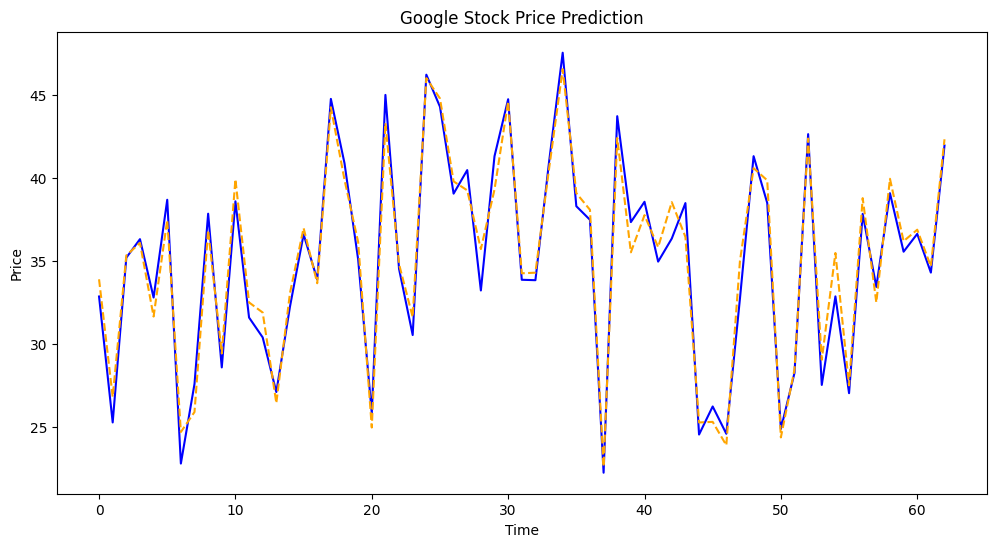

In [6]:
# use the 'Close' prces for forcasting:
prices = data['Sales'].values

#Step2: Normalise the data (MinMaxScalre for scaling between 0 - 1)
scaler = MinMaxScaler(feature_range =(0, 1))
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1))

def create_sequences(data, n_steps):
 """
 Creates sequences of n_steps length using NumPy's slicing.
 """
 data = np.array(data) # Ensure data is a NumPy array
 num_samples = len(data) - n_steps
 x = np.array([data[i:i + n_steps] for i in range(num_samples)])
 y = data[n_steps:]
 return x, y

n_steps = 50 # Number of time steps in each input sequence
x , y = create_sequences(prices_scaled, n_steps)

# Step 4: Split data into training and testing sets using train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

#Step 5: Build the RNN model
model = Sequential([
 SimpleRNN(50, activation = 'tanh', input_shape = (n_steps, 1)),
 Dense(1) # Output layer for regression (Single values)
])

# Compile the model
model.compile(optimizer = 'adam', loss = 'mse')

# Step 6: Train the model
history = model.fit(x_train, y_train, epochs = 20, batch_size = 32, validation_split = 0.2)

# Step 7: Evaluate the model
loss = model.evaluate(x_test, y_test)
print("Test loss: {loss:.4f}")

#Step 8: Make predictions and inverse  transform the scaling
y_pred = model.predict(x_test)
y_pred_orignal = scaler.inverse_transform(y_pred)
y_test_orignal = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12,6))
plt.plot(y_test_orignal, label='True Prices', color='blue')
plt.plot(y_pred_orignal, label='Predicted Prices', color='orange', linestyle='dashed')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel("Price")
plt.show()

In [7]:
loss = model.evaluate(x_test, y_test)
print("Test loss: {loss:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0015
Test loss: {loss:.4f}
